# Modelling

In [453]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
rcParams['figure.figsize'] = (7,5)
rcParams['figure.dpi'] = 120
rcParams['savefig.dpi'] = 120 

rcParams['axes.facecolor'] = 'white'
matplotlib.style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import missingno as msno
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import  KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

%matplotlib inline

## linear regression

In [403]:
ffs_players_salary = pd.read_csv('fmanual_feature_Select_players_salary.csv.gz',index_col=0)

In [404]:
print(ffs_players_salary.shape)
ffs_players_salary.head()

(385, 12)


,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
0,19863636.0,1914.0,314.0,726.0,500.0,246.0,137.0,203.0,338.0,215.0,94.0,833.0
1,2329200.0,1368.0,202.0,496.0,293.0,122.0,62.0,72.0,111.0,193.0,75.0,546.0
3,1618520.0,756.0,100.0,220.0,115.0,61.0,48.0,62.0,76.0,35.0,36.0,287.0
5,1000000.0,293.0,30.0,75.0,28.0,16.0,9.0,13.0,28.0,14.0,7.0,83.0
6,28000000.0,1848.0,289.0,654.0,390.0,200.0,55.0,73.0,320.0,244.0,65.0,722.0


### salary value quite huge, We could scaled it. 

In [429]:
salary_col = ffs_players_salary['Salary']
salary_scaled = (salary_col-salary_col.min())/(salary_col.max()-salary_col.min()) *1000
ffs_players_salary['salary_scaled']= salary_scaled.copy()
ffs_players_salary.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS,salary_scaled
0,19863636.0,1914.0,314.0,726.0,500.0,246.0,137.0,203.0,338.0,215.0,94.0,833.0,489.284837
1,2329200.0,1368.0,202.0,496.0,293.0,122.0,62.0,72.0,111.0,193.0,75.0,546.0,49.622195
3,1618520.0,756.0,100.0,220.0,115.0,61.0,48.0,62.0,76.0,35.0,36.0,287.0,31.802435
5,1000000.0,293.0,30.0,75.0,28.0,16.0,9.0,13.0,28.0,14.0,7.0,83.0,16.293516
6,28000000.0,1848.0,289.0,654.0,390.0,200.0,55.0,73.0,320.0,244.0,65.0,722.0,693.297974


### we all know the point and Minutes Played are very important indeces for player. I assumed the salary has linear relationship with them.

### linear regression salary with points (PTS)

It is easy to get  that  using  Linear and Polynomial models can not get good R-squared result.

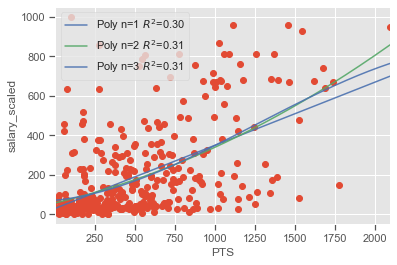

<Figure size 1800x1080 with 0 Axes>

-------------
-------------
                            OLS Regression Results                            
Dep. Variable:          salary_scaled   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     57.07
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.72e-30
Time:                        23:11:04   Log-Likelihood:                -2561.7
No. Observations:                 385   AIC:                             5131.
Df Residuals:                     381   BIC:                             5147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        7

In [406]:

plt.scatter( ffs_players_salary.PTS, ffs_players_salary.salary_scaled, s=10, alpha=0.3)
plt.xlabel('PTS')
plt.ylabel('salary_scaled')
x = pd.DataFrame({'PTS': np.linspace(ffs_players_salary.PTS.min(), ffs_players_salary.PTS.max(), len(ffs_players_salary.PTS)) })

x_min = ffs_players_salary.PTS.min()
x_max = ffs_players_salary.PTS.max()
plt.xlim(x_min,x_max)
plt.plot(ffs_players_salary.PTS,ffs_players_salary.salary_scaled, 'o')


poly_1 = smf.ols(formula='salary_scaled ~ 1 + PTS', data=ffs_players_salary).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

poly_2 = smf.ols(formula='salary_scaled ~ 1 + PTS + I(PTS ** 2.0)', data=ffs_players_salary).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)


poly_3 = smf.ols(formula='salary_scaled ~ 1 + PTS + I(PTS ** 2.0)+ I(PTS ** 3.0)', data=ffs_players_salary).fit()
plt.plot(x, poly_3.predict(x), 'b-', label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared, alpha=0.9)

plt.legend()
plt.figure(dpi=180, figsize=(10, 6))

plt.show()
# print(poly_1.summary())
print("-------------")
# print(poly_2.summary())
print("-------------")
print(poly_3.summary())

### linear regression salary with Minutes Played (MP)¶

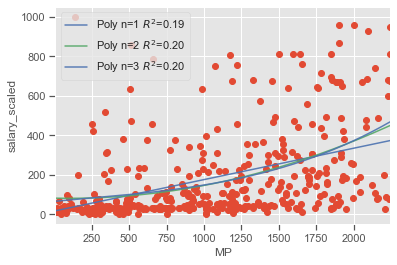

<Figure size 1800x1080 with 0 Axes>

-------------
-------------
                            OLS Regression Results                            
Dep. Variable:          salary_scaled   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     32.41
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.12e-18
Time:                        23:47:09   Log-Likelihood:                -2589.4
No. Observations:                 385   AIC:                             5187.
Df Residuals:                     381   BIC:                             5203.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.1

In [433]:
plt.scatter( ffs_players_salary.MP, ffs_players_salary.salary_scaled, s=10, alpha=0.3)
plt.xlabel('MP')
plt.ylabel('salary_scaled')
x = pd.DataFrame({'MP': np.linspace(ffs_players_salary.MP.min(), ffs_players_salary.MP.max(), len(ffs_players_salary.MP)) })

x_min = ffs_players_salary.MP.min()
x_max = ffs_players_salary.MP.max()
plt.xlim(x_min,x_max)
plt.plot(ffs_players_salary.MP,ffs_players_salary.salary_scaled, 'o')


poly_1 = smf.ols(formula='salary_scaled ~ 1 + MP', data=ffs_players_salary).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

poly_2 = smf.ols(formula='salary_scaled ~ 1 + MP + I(MP ** 2.0)', data=ffs_players_salary).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)


poly_3 = smf.ols(formula='salary_scaled ~ 1 + MP + I(MP ** 2.0)+ I(MP ** 3.0)', data=ffs_players_salary).fit()
plt.plot(x, poly_3.predict(x), 'b-', label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared, alpha=0.9)

plt.legend()
plt.figure(dpi=180, figsize=(10, 6))

plt.show()
# print(poly_1.summary())
print("-------------")
# print(poly_2.summary())
print("-------------")
print(poly_3.summary())

In [407]:
# ffs_players_salary.columns

### using all selected features to create a multiple linear model, however the result still not good enough.

In [434]:
linear_model3 = smf.ols(formula='salary_scaled ~ 1 + MP+ FG+ FGA+ FT+ FTA+ DRB+ AST+TOV+ PTS + P2A+P2', data=ffs_players_salary).fit()
print(linear_model3.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_scaled   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     24.50
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.64e-35
Time:                        23:47:56   Log-Likelihood:                -2536.2
No. Observations:                 385   AIC:                             5094.
Df Residuals:                     374   BIC:                             5138.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.5849     19.459      3.730      0.0

# using sklearn

### sklearn to trainning all features.

In [436]:
clear_players_salary = pd.read_csv('fmanual_feature_Select_players_salary.csv.gz',index_col=0)
clear_players_salary.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
0,19863636.0,1914.0,314.0,726.0,500.0,246.0,137.0,203.0,338.0,215.0,94.0,833.0
1,2329200.0,1368.0,202.0,496.0,293.0,122.0,62.0,72.0,111.0,193.0,75.0,546.0
3,1618520.0,756.0,100.0,220.0,115.0,61.0,48.0,62.0,76.0,35.0,36.0,287.0
5,1000000.0,293.0,30.0,75.0,28.0,16.0,9.0,13.0,28.0,14.0,7.0,83.0
6,28000000.0,1848.0,289.0,654.0,390.0,200.0,55.0,73.0,320.0,244.0,65.0,722.0


In [437]:
features_name = [ 'MP', 'FG', 'FGA', 'P2A', 'P2', 'FT', 'FTA', 'DRB', 'AST',
       'TOV', 'PTS']
X = clear_players_salary[features_name]
# y = clear_players_salary['Salary']
salary_col = ffs_players_salary['Salary']
y = (salary_col-salary_col.min())/(salary_col.max()-salary_col.min()) 


### split the dataset to trainning and testing

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=888)

In [442]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(308, 11)
(308,)
(77, 11)
(77,)


### StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [443]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)


### Linear regression trainning all features

In [445]:
poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=1)),
#     ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',RobustScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
### trainning result is 41% 

In [448]:
y_train_predict = poly_reg.predict(X_train)
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_train_predict))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_train_predict))

Mean squared error: 0.03
Coefficient of determination: 0.41


In [ ]:
### testing result is 33%. linear model not good engouh

In [449]:
y_test_predict = poly_reg.predict(X_test)
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_test_predict))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_test_predict))

Mean squared error: 0.03
Coefficient of determination: 0.33


### KNN regression trainning all features

### searching best params for knn. the result is using 3 neighbors, minkowski and distance.

In [423]:
best_score = 0.0
best_k = 0
best_weights = ''
best_metric =''

weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan','chebyshev']
for weight in weights:
    
    for metr in metric:

        for k in range(3, 20):
            knn_r = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric= metr,
                   metric_params=None, n_jobs=None, n_neighbors=k, p=1,
                   weights= weight )

            knn_r.fit(X_train,y_train)
            y_train_predict = knn_r.predict(X_train)
            score = r2_score(y_train,y_train_predict)
            if score > best_score :
                best_score = score
                best_k = k
                best_metric = metr
                best_weights = weight

print('best_score:',best_score)
print('best_k:',best_k)
print('best_metric:',best_metric)
print('best_weights:',best_weights)

best_score: 1.0
best_k: 3
best_metric: minkowski
best_weights: distance


In [424]:
knn_r = KNeighborsRegressor( metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='distance',
                          )
knn_r.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='distance')

### the training result is 100%

In [425]:
y_train_predict = knn_r.predict(X_train)
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_train_predict))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_train_predict))
knn_r.score(X_train, y_train)


Mean squared error: 0.00
Coefficient of determination: 1.00


1.0

### the model voerfitting so obvously 

In [426]:
y_test_predict = knn_r.predict(X_test)
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_test_predict))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_test_predict))
knn_r.score(X_test, y_test)


Mean squared error: 0.04
Coefficient of determination: 0.19


0.18994515316828878

### above experiment we could get a conclustion is that the dataset is not fit for regression method. We could try classifier to perdict salary of player

## Classifier

In [478]:
# ffs_players_salary = pd.read_csv('fmanual_feature_Select_players_salary.csv.gz',index_col=0)
# ffs_players_salary.head()

In [479]:
# salary_col = ffs_players_salary['Salary']
# salary_scaled = (salary_col-salary_col.min())/(salary_col.max()-salary_col.min())
# ffs_players_salary['salary_scaled']= salary_scaled.copy()
# ffs_players_salary.head()

###  I group the player to 4 levels as edge players, normal players, first players,stars  by salary. 

In [482]:
conditions = [
        (ffs_players_salary['salary_scaled']  <= 0.2),
        (ffs_players_salary['salary_scaled']  <= 0.4),
        (ffs_players_salary['salary_scaled']  <= 0.6),
        (ffs_players_salary['salary_scaled']  > 0.8)
]
choices = [1, 2,3,4]
ffs_players_salary['Nominal'] = np.select(conditions, choices, default=3)
ffs_players_salary.head()
# edge players（边缘球员）
# normal players（轮换球员）
# first players（首发球员）
# stars（明星球员）

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS,salary_scaled,Nominal
0,19863636.0,1914.0,314.0,726.0,500.0,246.0,137.0,203.0,338.0,215.0,94.0,833.0,0.489285,3
1,2329200.0,1368.0,202.0,496.0,293.0,122.0,62.0,72.0,111.0,193.0,75.0,546.0,0.049622,1
3,1618520.0,756.0,100.0,220.0,115.0,61.0,48.0,62.0,76.0,35.0,36.0,287.0,0.031802,1
5,1000000.0,293.0,30.0,75.0,28.0,16.0,9.0,13.0,28.0,14.0,7.0,83.0,0.016294,1
6,28000000.0,1848.0,289.0,654.0,390.0,200.0,55.0,73.0,320.0,244.0,65.0,722.0,0.693298,3


### 大部分的NBA球员薪资还是处于较低的水平，而其中间薪资的球员也是比较多，薪水较高的球员较少，这也符合正常规律


<Figure size 400x240 with 0 Axes>

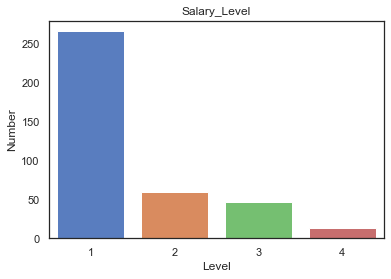

<Figure size 400x240 with 0 Axes>

In [483]:
bar=ffs_players_salary['Nominal'].value_counts()
sns.set(font_scale=2)
sns.set(style="white", palette="muted",color_codes=True)
ax = sns.barplot(x=bar.index,y=bar )
ax.set(xlabel='Level',ylabel='Number',title="Salary_Level")
plt.figure(dpi=80, figsize=(5, 3))


In [485]:
features_name = [ 'MP', 'FG', 'FGA', 'P2A', 'P2', 'FT', 'FTA', 'DRB', 'AST','TOV', 'PTS']

X = ffs_players_salary[features_name]
y = ffs_players_salary['Nominal']


### split the dataset to trainning and testing

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=888)

In [488]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(308, 11)
(308,)
(77, 11)
(77,)


### using KNN classifier to trainning and searching best params for the model

In [489]:
best_score = 0.0
best_k = 0
best_weights = ''
best_metric =''

weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan','chebyshev']
for weight in weights:
    
    for metr in metric:

        for k in range(3, 20):
            knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric= metr,
                   metric_params=None, n_jobs=None, n_neighbors=k, p=1,
                   weights= weight )

            knn.fit(X_train,y_train)
            y_train_predict = knn.predict(X_train)
            score = accuracy_score(y_train,y_train_predict)
            if score > best_score :
                best_score = score
                best_k = k
                best_metric = metr
                best_weights = weight

print('best_score:',best_score)
print('best_k:',best_k)
print('best_metric:',best_metric)
print('best_weights:',best_weights)

best_score: 1.0
best_k: 3
best_metric: minkowski
best_weights: distance


In [490]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='distance',
                          )
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [491]:
y_train_predict = knn.predict(X_train)
print ("KNN Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

KNN Train Accuracy: 1.000


In [467]:
y_test_predict = knn.predict(X_test)
print ("KNN Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

KNN Test Accuracy: 0.636


In [ ]:
### we could get the information from confusion matrix that the model ease

              precision    recall  f1-score   support

           1       0.74      0.83      0.78        54
           2       0.11      0.10      0.11        10
           3       0.43      0.25      0.32        12
           4       0.00      0.00      0.00         1

    accuracy                           0.64        77
   macro avg       0.32      0.30      0.30        77
weighted avg       0.60      0.64      0.61        77



/Users/Tommy/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


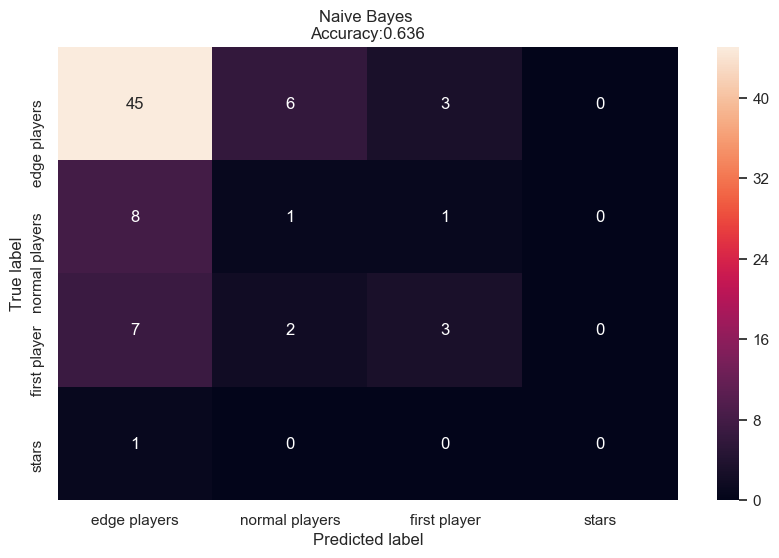

In [468]:
print (classification_report(y_test,y_test_predict))
cm = confusion_matrix(y_test, y_test_predict) 
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players','first player','stars'], 
                     columns = ['edge players','normal players','first player','stars'])

plt.figure(dpi=100, figsize=(10, 6))

sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_test_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## SVM

In [469]:
svm= SVC(C=1, kernel='rbf', degree=2, gamma=0.005,coef0=1,shrinking=True, tol=0.5,probability=False,
        max_iter=-1,)
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.5,
    verbose=False)

In [470]:
y_train_predict = svm.predict(X_train)
print ("SVM Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

SVM Train Accuracy: 1.000


In [471]:
y_test_predict = svm.predict(X_test)
print("Logistic Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Logistic Test Accuracy: 0.701


              precision    recall  f1-score   support

           1       0.70      1.00      0.82        54
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         1

    accuracy                           0.70        77
   macro avg       0.18      0.25      0.21        77
weighted avg       0.49      0.70      0.58        77



/Users/Tommy/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


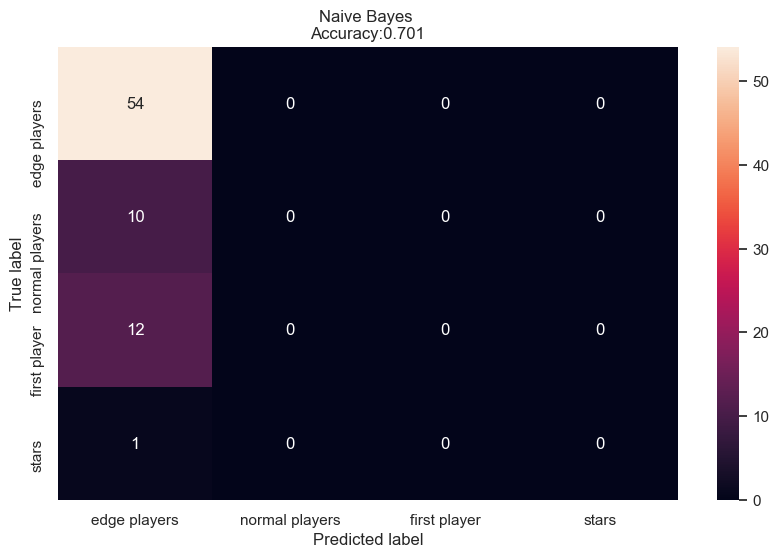

In [472]:
print (classification_report(y_test,y_test_predict))
cm = confusion_matrix(y_test, y_test_predict) 
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players','first player','stars'], 
                     columns = ['edge players','normal players','first player','stars'])

plt.figure(dpi=100, figsize=(10, 6))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_test_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest¶

In [473]:
forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=None,
                                n_estimators = 100, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
forest.fit(X_train,y_train)
forest.oob_score_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


0.672077922077922

In [474]:
y_train_predict = forest.predict(X_train)
print ("Random Forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))


Random Forest Train Accuracy: 1.000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [475]:
y_test_predict = forest.predict(X_test)
print("Random Forest Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest Test Accuracy: 0.636


Text(0.5, 1.0, 'Feature Importance')

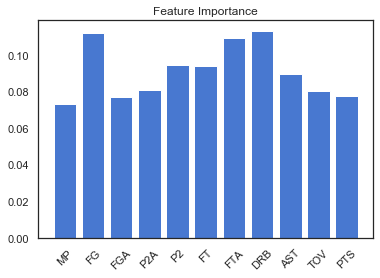

In [476]:
plt.bar(range(len(X_train.columns.values)), forest.feature_importances_)
plt.xticks(range(len(X_train.columns.values)),X_train.columns.values, rotation= 45)

plt.title('Feature Importance')

              precision    recall  f1-score   support

           1       0.73      0.85      0.79        54
           2       0.00      0.00      0.00        10
           3       0.25      0.17      0.20        12
           4       1.00      1.00      1.00         1

    accuracy                           0.64        77
   macro avg       0.50      0.50      0.50        77
weighted avg       0.56      0.64      0.60        77



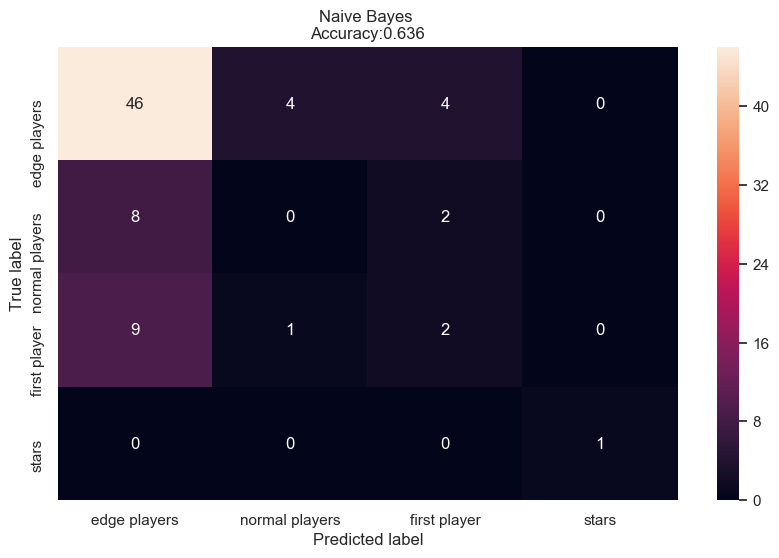

In [477]:
print (classification_report(y_test,y_test_predict))
cm = confusion_matrix(y_test, y_test_predict) 
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players','first player','stars'], 
                     columns = ['edge players','normal players','first player','stars'])

plt.figure(dpi=100, figsize=(10, 6))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_test_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

*****
